In [1]:
import pandas as pd
import functions as fn
import pandas as pd
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import emoji

# Read the text file into a DataFrame
df_demo = pd.read_csv('../Data/Raw data/df_final_demo (1).txt', delimiter=',', header=0)
df_web_data1 = pd.read_csv('../Data/Raw data/df_final_web_data_pt_1.txt', delimiter=',', header=0)
df_web_data2 = pd.read_csv('../Data/Raw data/df_final_web_data_pt_2.txt', delimiter=',', header=0)
df_experiment_clients = pd.read_csv('../Data/Raw data/df_final_experiment_clients.txt', delimiter=',', header=0)

### Cleaning, Mergin  And loading the final Dataset

In [2]:
df=fn.merge_clean_transform_data(df_web_data1, df_web_data2, df_demo, df_experiment_clients, on='client_id', n=5)

  client_id  client_tenure_years  client_tenure_months  client_age gender  \
0    836976                  6.0                  73.0        60.5      U   
1    836976                  6.0                  73.0        60.5      U   
2    836976                  6.0                  73.0        60.5      U   
3    836976                  6.0                  73.0        60.5      U   
4    836976                  6.0                  73.0        60.5      U   

   number_of_accounts  balance  calls_last_6_months  logins_last_6_months  \
0                 2.0  45105.3                  6.0                   9.0   
1                 2.0  45105.3                  6.0                   9.0   
2                 2.0  45105.3                  6.0                   9.0   
3                 2.0  45105.3                  6.0                   9.0   
4                 2.0  45105.3                  6.0                   9.0   

  variation            visitor_id                     visit_id process_ste

### Univariate Analysis

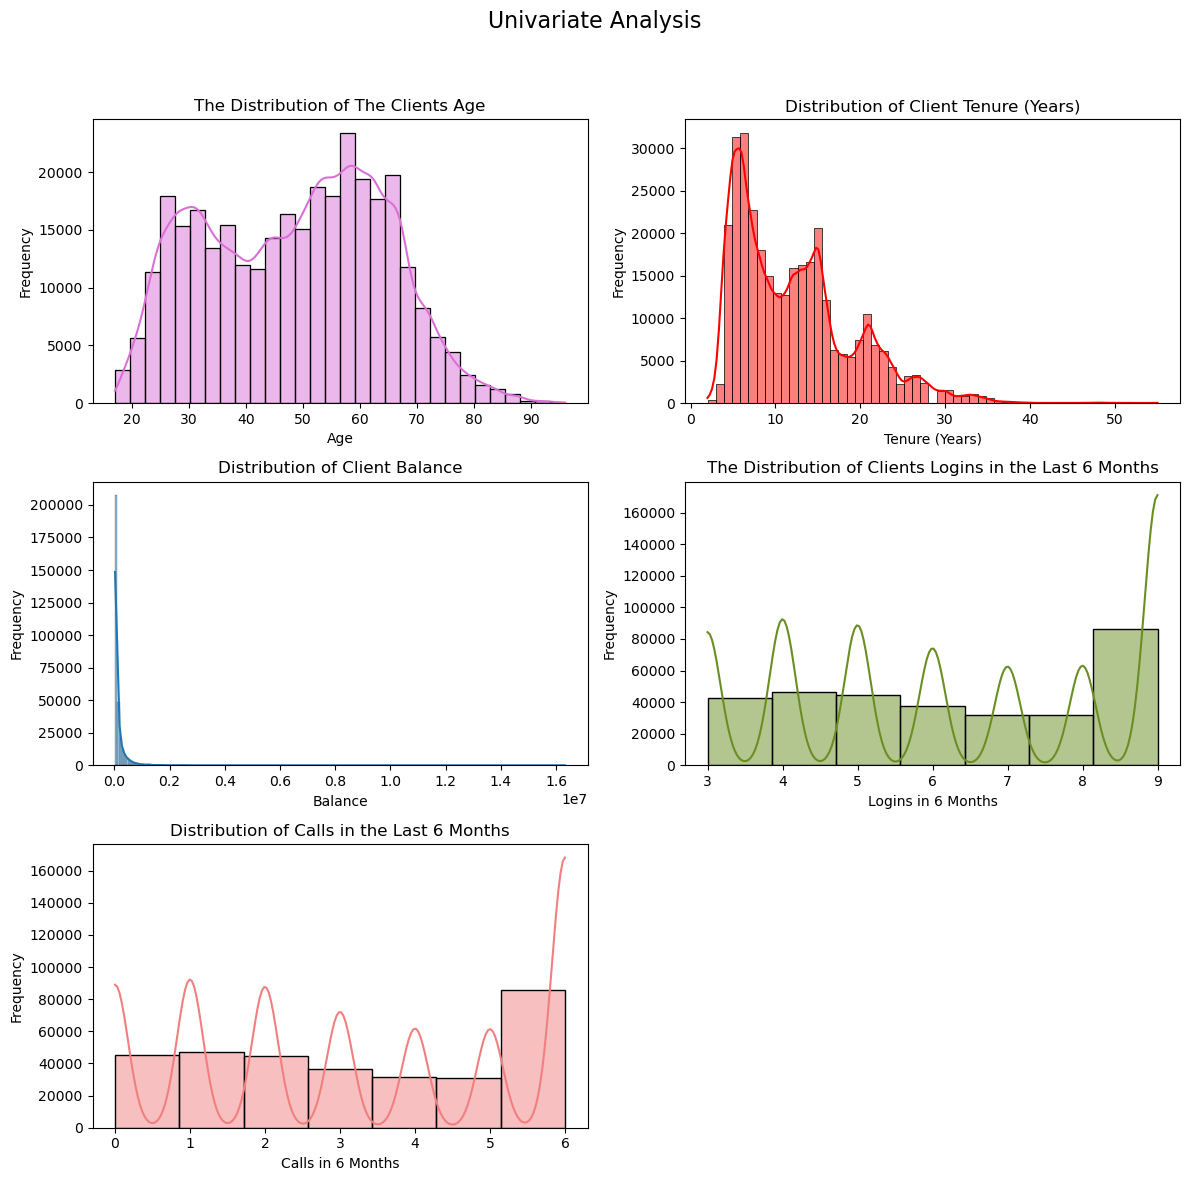

In [3]:
univariate_Analysis= fn.UnivariateAnalysis(df)

### Bivariate Analysis 

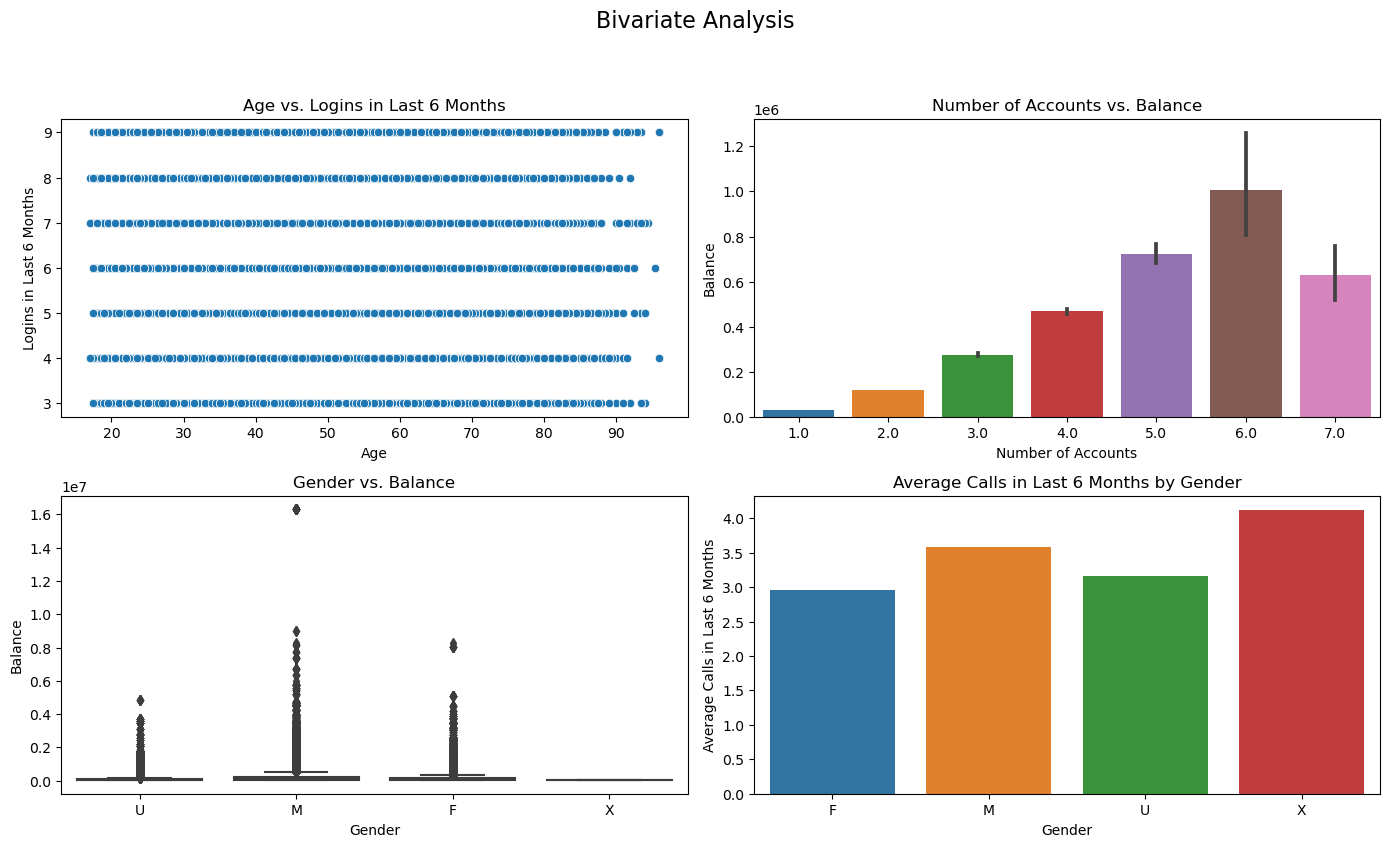

In [4]:
bivariante_analysis = fn.BivariateAnalysis(df)

#### The experiment Sample charachtaristiscs 

* what is the number of clients in the experiment sample in both test and control group
* what is the Age distribution in the experiment sample in both test and control group 
* what is the Gender distribution in the experiment sample in both test and control group 

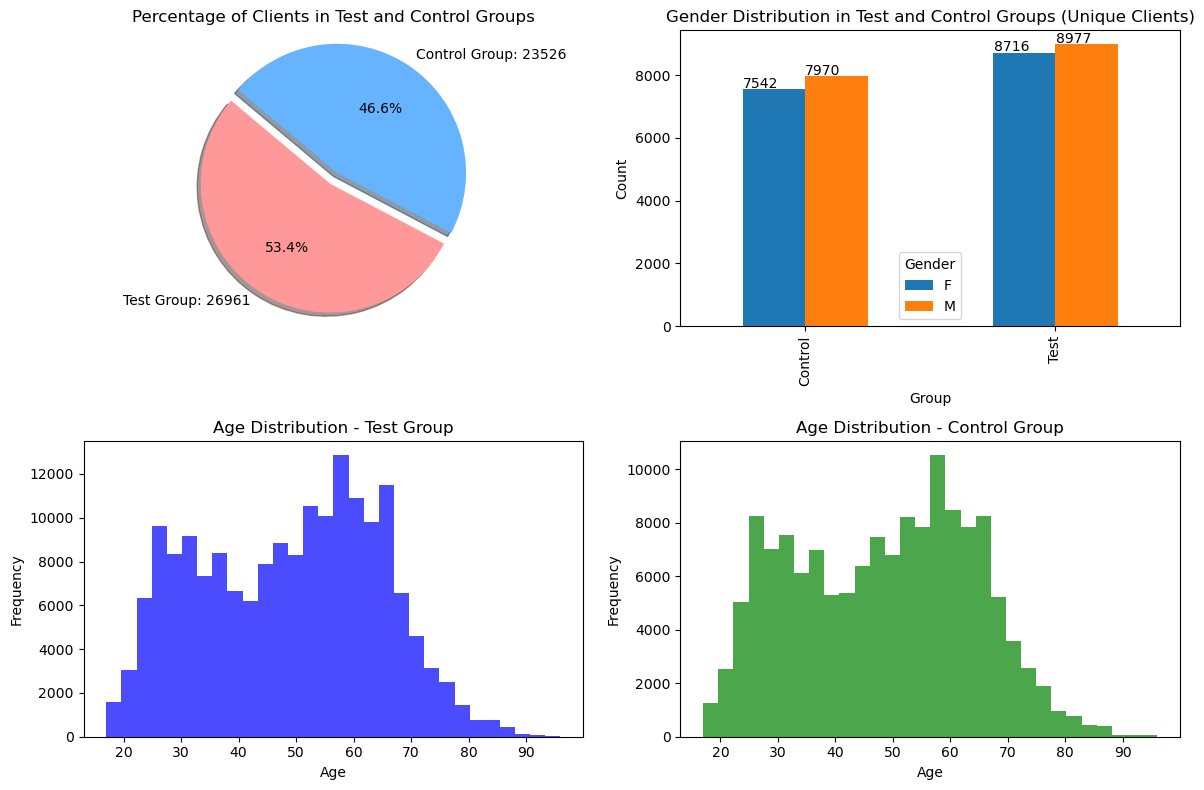

Number of clients by gender in each group:
gender        F     M
variation            
Control    7542  7970
Test       8716  8977


In [5]:
Experiment_sample_charachtaristic= fn.combined_analysis(df)

# Hypothesis testing

### Hypothesis 1 - The New Website Drives More Confirmations


### **1-Confirmed if the difference in completion rate of the the new design and the old design is statistically significant**
#### **To conduct the required analysis, we need to:**

1 -Identify which rows correspond to the final step in the process (completion).

2- Calculate the completion rate 
 * for test group
 * for control group

 3- Perform the necessary statistical tests.
* Independent t-test: To check if the difference in completion rates is statistically significant.
* Proportion test: To verify if the increase meets or exceeds the 5% threshold.
* Chi-square test: To assess the association between design and completion status.

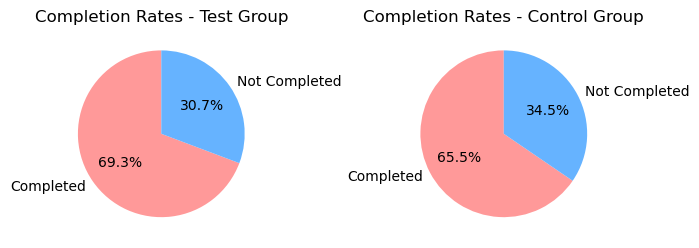

Completion Rates:
Test Group: 69.27%
Control Group: 65.47%
Z-statistic: 9.08
P-value: 1.06e-19


In [6]:
completion_rate_difrences=fn.analyze_experiment_completion_rates(df)

### Hypothesis 2 - Clients in the New Website Face Fewer Errors

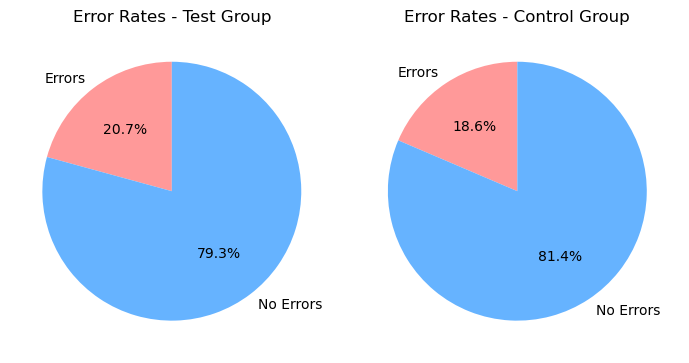

Error Rates:
Test Group: 20.74%
Control Group: 18.58%
Z-statistic: 6.09
P-value: 1.12e-09


In [7]:
error_rate= fn.analyze_experiment_error_rates(df)

## Hypothesis 3: The New Website Drives Clients to Log In More Frequently
Steps:
* Load the Dataset and Filter by Timeframe.
* Extract Logins Data for Both Groups.
* Perform a T-Test to Compare Means.
* Save Results in a DataFrame.
* Visualize Results with a Bar Chart.

Mean Logins:
Test Group: 6.25
Control Group: 6.31
T-statistic: -8.62
P-value: 7.00e-18


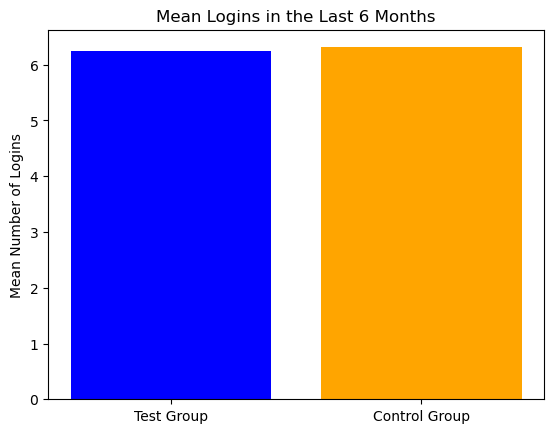

In [8]:
login_frequencey= fn.analyze_logins_between_groups(df)

### Hypothesis4 : The New Website Improves User Efficiency by Reducing Time Spent on Each Step


To test this hypothesis, we will:

* Calculate the average time spent on each step for both the control and test groups.
* Compare the average times to determine if there is a significant reduction in the test group.

Steps:
* Load the Dataset and Filter by Timeframe
* Calculate the Time Difference Between Steps
* Calculate the Average Time Spent on Each Step for Both Groups
* Perform Statistical Test (T-Test) to Compare Times
* Save Results in a DataFrame
* Visualize Results

Average Time Spent on Each Step:
  variation process_step  time_diff_seconds
0   Control      confirm         128.652690
1   Control        start         154.356808
2   Control       step_1          43.121964
3   Control       step_2          38.594363
4   Control       step_3          92.920811
5      Test      confirm         128.936357
6      Test        start         148.361779
7      Test       step_1          37.745559
8      Test       step_2          48.171647
9      Test       step_3          96.911007

T-test Results for Each Step:
  process_step  t_statistic       p_value
0      confirm     0.128899  8.974379e-01
1        start    -1.301314  1.931617e-01
2       step_1    -6.923763  4.439635e-12
3       step_2    13.603505  4.482617e-42
4       step_3     3.635119  2.781433e-04


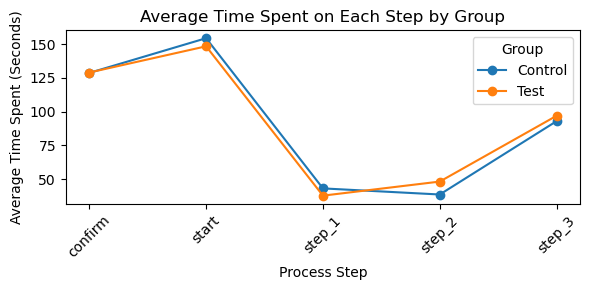

In [9]:
time_per_step=fn.analyze_time_per_step_between_groups(df)

## Hypothesis 6
#### Males makes more confrims than females in both test and control group. 
analyzing confirmation rate by gender 

Test Group - Confirmation counts and percentages by gender:
        Count  Percentage
gender                   
M        8963   52.259343
F        8188   47.740657

Control Group - Confirmation counts and percentages by gender:
        Count  Percentage
gender                   
M        6039   52.186312
F        5533   47.813688


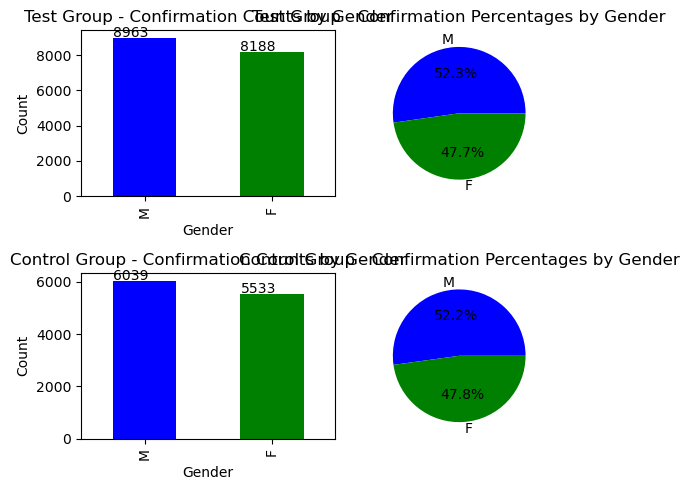

Chi-square test for the test group: chi2 = 0.0, p-value = 1.0
Chi-square test for the control group: chi2 = 0.0, p-value = 1.0
There is no significant difference in confirmation rates between genders in the test group.
There is no significant difference in confirmation rates between genders in the control group.


In [10]:
confirmation_by_gender= fn.analyze_confirmation_by_gender(df)

we can see that there is 47.99% increase in females confirms between test and control group. 
and for me is 48.41% increase ...


the website is well designed for both males and females, because it increased the confirm rate equally. 